In [778]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import datetime

In [779]:
#import data and examine columns
data = pd.read_csv('FI Case Data.csv')
data.columns.tolist()

['Data', 'Year', 'Month ', 'Value']

In [780]:
#examine unique metrics
data.Data.unique()

array(['Consumer Price Index', 'Unemployment Level',
       'Civilian Labor Force', 'CPI'], dtype=object)

In [781]:
#reformat 
data = data.replace('Consumer Price Index', 'CPI')
data.Data.unique()

array(['CPI', 'Unemployment Level', 'Civilian Labor Force'], dtype=object)

In [782]:
#examine datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1948 entries, 0 to 1947
Data columns (total 4 columns):
Data      1948 non-null object
Year      1948 non-null int64
Month     1948 non-null int64
Value     1948 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 61.0+ KB


In [783]:
#examine statistical qualities of dataset
data.describe()

,Year,Month,Value
count,1948.000000,1948.000000,1948.000000
mean,1981.856263,6.348049,18196.392837
std,20.091212,3.460395,38979.755563
min,1947.000000,1.000000,21.480000
25%,1964.000000,3.000000,114.175000
50%,1982.000000,6.000000,3030.500000
75%,1999.000000,9.000000,8221.500000
max,2017.000000,12.000000,159580.000000


In [784]:
#create function to create dataframe of metric data by annual means
def dfcreator(df, my_list=[]):
    new_df = pd.DataFrame()
    new_df['Year'] =(df['Year'].unique)
    new_df = new_df.set_index('Year')
    for i in my_list:
        temp_df = df.loc[(df['Data']) == i]
        temp_df = temp_df.groupby('Year').mean()
        temp_df = temp_df.drop('Month ',axis=1)
        temp_df[str(i)+'_Value'] = temp_df
        new_df = pd.concat([new_df, temp_df])
        temp_df = pd.DataFrame()
    new_df = new_df.groupby('Year').mean()
    new_df = new_df.drop('Value', axis=1)
    return new_df

In [785]:
#create and examine new dataframe
metric_list =['CPI','Unemployment Level', 'Civilian Labor Force']
metric_data = dfcreator(data,my_list=metric_list)
metric_data.tail()

,CPI_Value,Civilian Labor Force_Value,Unemployment Level_Value
Year,,,
2013,232.948917,155395.5,11456.583333
2014,236.703917,155906.5,9598.166667
2015,236.987250,157128.0,8287.833333
2016,240.009250,159186.5,7749.583333
2017,244.307000,NaN,7581.500000


In [786]:
#define and create inflation and unemployment rate functions
def inflation(cpi_initial, cpi_end):
    return ((cpi_end - cpi_initial)/ cpi_initial) * 100

def unemployment_rate(unemployment_level, labor_force):
    return (unemployment_level / labor_force) * 100


In [787]:
#pass inflation and unemployment rate functions over dataframe
metric_data['Inflation'] = inflation(metric_data.CPI_Value.shift(), metric_data.CPI_Value)
metric_data['Unemployment_Rate'] = unemployment_rate(metric_data['Unemployment Level_Value'], metric_data['Civilian Labor Force_Value'])
metric_data.tail()

,CPI_Value,Civilian Labor Force_Value,Unemployment Level_Value,Inflation,Unemployment_Rate
Year,,,,,
2013,232.948917,155395.5,11456.583333,1.464737,7.372532
2014,236.703917,155906.5,9598.166667,1.611941,6.156361
2015,236.987250,157128.0,8287.833333,0.119699,5.274574
2016,240.009250,159186.5,7749.583333,1.275174,4.868242
2017,244.307000,NaN,7581.500000,1.790660,NaN


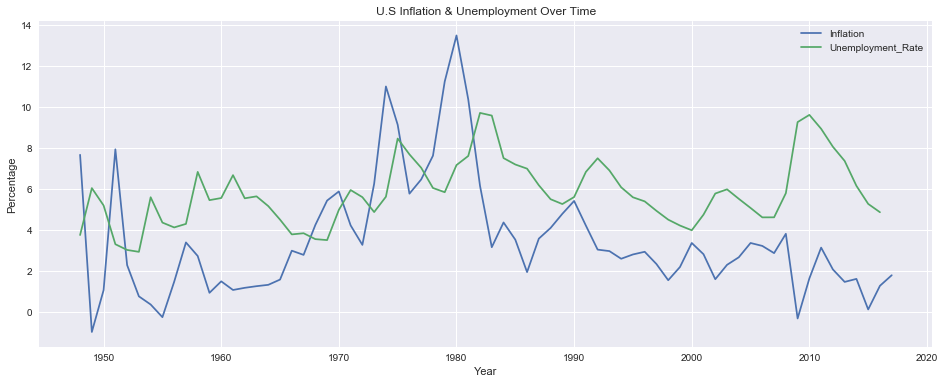

In [788]:
#inflation and unemployment plot
fig = plt.figure(figsize=(16, 6))
sns.set(style='darkgrid')
plt.plot(metric_data.Inflation)
plt.plot(metric_data.Unemployment_Rate)
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title('U.S Inflation & Unemployment Over Time')
plt.legend()
plt.show()

![phillips curve](phillipcurve.jpg)

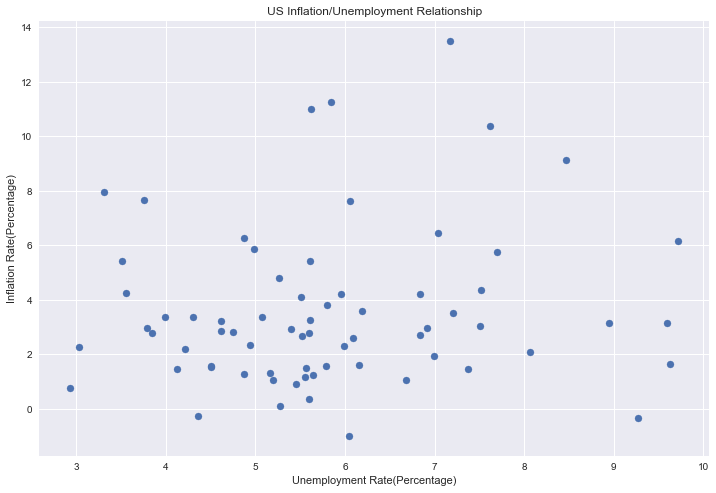

In [789]:
#inflation/unemployment rate relationship plot
fig = plt.figure(figsize=(12, 8))
sns.set(style='darkgrid')
plt.scatter(metric_data.Unemployment_Rate, metric_data.Inflation)
plt.xlabel("Unemployment Rate(Percentage)")
plt.ylabel("Inflation Rate(Percentage)")
plt.title('US Inflation/Unemployment Relationship')
plt.show()

Text(0.5,1,'US Inflation/Unemployment Relationship')

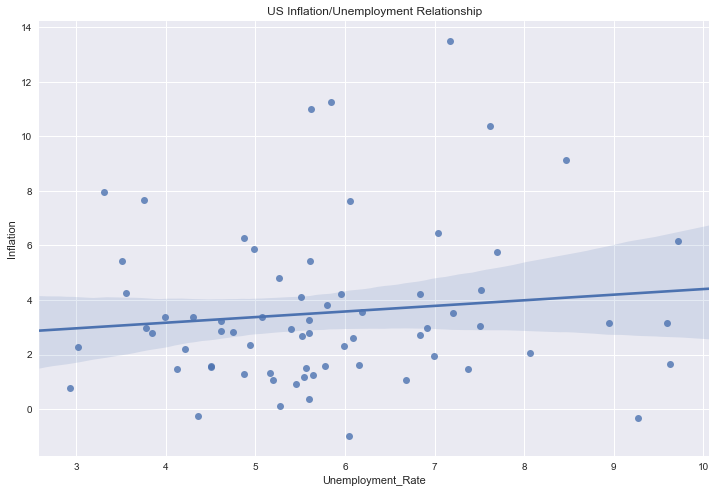

In [790]:
#inflation/unemployment rate relationship plot with line of best fit
fig = plt.figure(figsize=(12, 8))
sns.set(style='darkgrid')
sns.regplot(metric_data.Unemployment_Rate, metric_data.Inflation)
plt.title('US Inflation/Unemployment Relationship')

In [772]:
#load in euro cpi data
euro_cpi = pd.read_csv('EU_CPI_Data.csv')
euro_cpi.DATE = pd.to_datetime(euro_cpi.DATE) 
euro_cpi = euro_cpi.groupby(euro_cpi['DATE'].map(lambda x:x.year)).mean()
euro_cpi.reset_index(inplace=True)

In [773]:
#load in euro unemployment data
euro_unemp = pd.read_csv('EU_Unemp_Data.csv')
euro_unemp.DATE = pd.to_datetime(euro_unemp.DATE)
euro_unemp = euro_unemp.groupby(euro_unemp['DATE'].map(lambda x:x.year)).mean()
euro_unemp.reset_index(inplace=True)

In [776]:
#combine dataframes and calculate inflation rate
euro_data = pd.merge(euro_cpi,euro_unemp, on=['DATE'])
euro_data['Inflation'] = inflation(euro_data.EURO_CPI.shift(),euro_data.EURO_CPI)
euro_data.tail(2)

,DATE,EURO_CPI,EU_Unemployment_Rate,Inflation
21,2017,101.775833,9.066667,1.538065
22,2018,103.561667,8.200000,1.754673


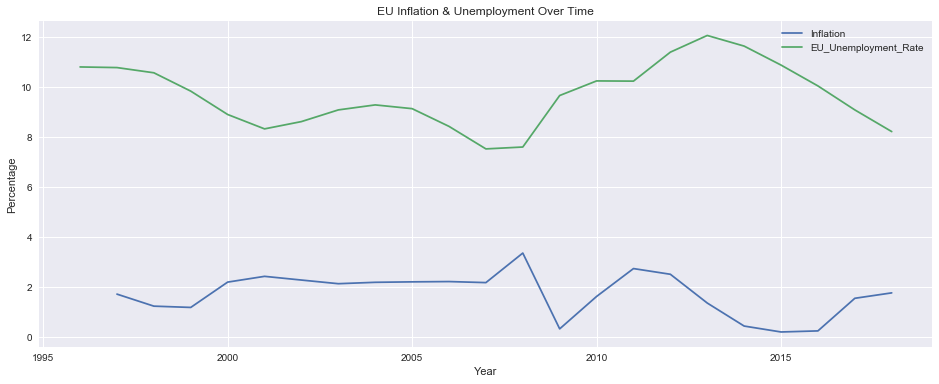

In [775]:
#eurozone inflation and unemployment plot
fig = plt.figure(figsize=(16, 6))
sns.set(style='darkgrid')
plt.plot(euro_data.DATE, euro_data.Inflation)
plt.plot(euro_data.DATE, euro_data.EU_Unemployment_Rate)
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title('EU Inflation & Unemployment Over Time')
plt.legend()
plt.show()

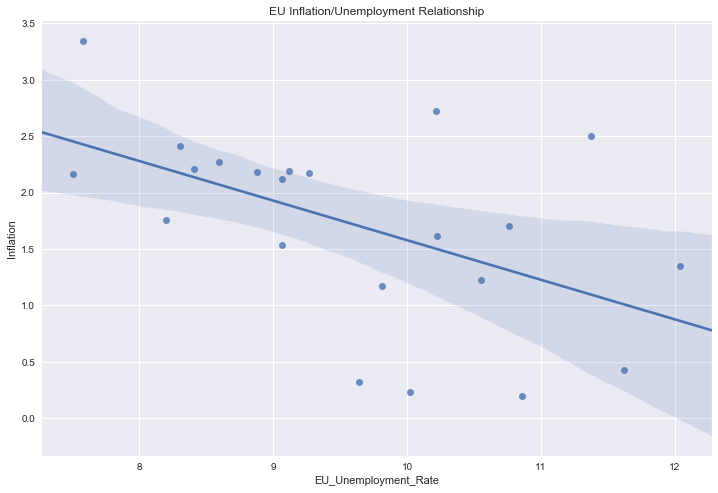

In [777]:
#eurozone inflation/unemployment relationship
fig = plt.figure(figsize=(12, 8))
sns.set(style='darkgrid')
sns.regplot(euro_data.EU_Unemployment_Rate, euro_data.Inflation)
plt.title('EU Inflation/Unemployment Relationship')
plt.show()

In [627]:
#create arrays of metrics by decade
seventies_inflation = metric_data.Inflation[(metric_data.index > 1970) & (metric_data.index < 1980)]
eighties_inflation = metric_data.Inflation[(metric_data.index > 1980) & (metric_data.index < 1990) ]
nineties_inflation = metric_data.Inflation[(metric_data.index > 1990) & (metric_data.index < 2000) ]
millenium_inflation = metric_data.Inflation[(metric_data.index > 2000)]

seventies_unemployment = metric_data.Unemployment_Rate[(metric_data.index > 1970) & (metric_data.index < 1980)]
eighties_unemployment = metric_data.Unemployment_Rate[(metric_data.index > 1980) & (metric_data.index < 1990) ]
nineties_unemployment = metric_data.Unemployment_Rate[(metric_data.index > 1990) & (metric_data.index < 2000) ]
millenium_unemployment = metric_data.Unemployment_Rate[(metric_data.index > 2000)]

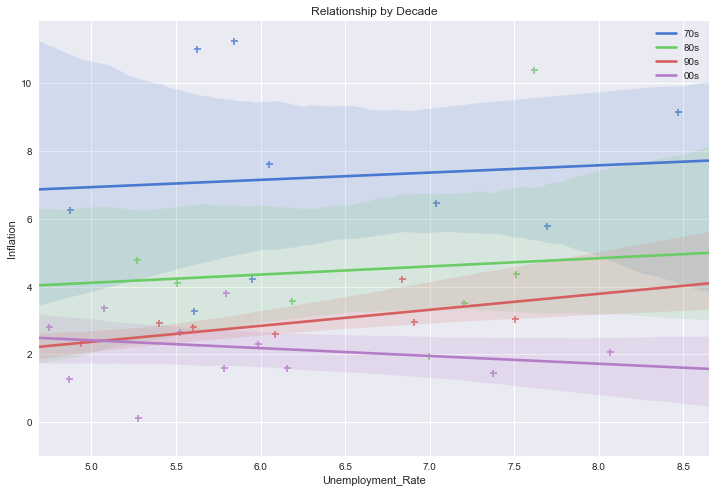

In [679]:
#inflation/unemployment relationship by decade with line of best fit
fig = plt.figure(figsize=(12, 8))
sns.set(style='darkgrid', palette='muted')
sns.regplot(seventies_unemployment,seventies_inflation, marker='+')
sns.regplot(eighties_unemployment,eighties_inflation, marker='+')
sns.regplot(nineties_unemployment,nineties_inflation, marker='+')
sns.regplot(millenium_unemployment,millenium_inflation, marker='+')
plt.legend(labels=['70s','80s','90s','00s'])
plt.title("Relationship by Decade")
plt.show()

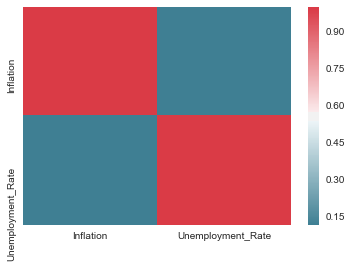

In [711]:
#correlation heatmap
corr = metric_data[['Inflation','Unemployment_Rate']].corr()

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap)

In [694]:
#calculate and display correlations between inflation and unemployment
def correlation_finder(x,y):
    return x.corr(y)

print("Correlation 1970s: "+str(correlation_finder(seventies_inflation,seventies_unemployment)))
print("Correlation 1980s: "+str(correlation_finder(eighties_inflation,eighties_unemployment)))
print("Correlation 1990s: "+str(correlation_finder(nineties_inflation,nineties_unemployment)))
print("Correlation 2000s: "+str(correlation_finder(millenium_inflation,millenium_unemployment)))
print("Correlation Overall "+str(correlation_finder(metric_data.Inflation,metric_data.Unemployment_Rate)))
print("Correlation In EU Since 1996: "+str(correlation_finder(euro_data.Inflation,euro_data.EU_Unemployment_Rate)))

Correlation 1970s: 0.08794790962917748
Correlation 1980s: 0.15658719093904352
Correlation 1990s: 0.7383262045092074
Correlation 2000s: -0.3466883240185131
Correlation Overall 0.1152848858760731
